In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Supervised Machine Learning with Scikit-Learn


1. **Datasets:** List of multidimensional observations


2. **Estimator Objects:** Any object that learns from data.
   In estimators you can: - Set parameters `estimator = Estimator(param1=1, param2=2)` - Fit some data `estimator.fit(data)` - Predict the output from some data `estimator.predict(data)`


## Example: Classifying Irises

The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width:

We will use this very simple dataset to explain ML concepts


In [2]:
# loads iris dataset
iris = datasets.load_iris()

# Sets the data to iris_x
iris_X = iris.data

# Sets the target to iris_y
iris_y = iris.target

# shows the unique targets
np.unique(iris_y)

array([0, 1, 2])

## K-Nearest Neighbor Classifier

- One of the most simple classifiers


- Finds a predefined number of training samples (defined by the user) to a new point for classification


![](figs/KNN-Classification.gif)


- Can use any distance metric but most commonly Euclidean distance


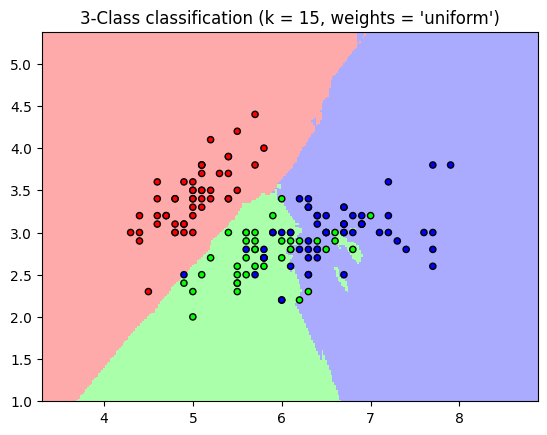

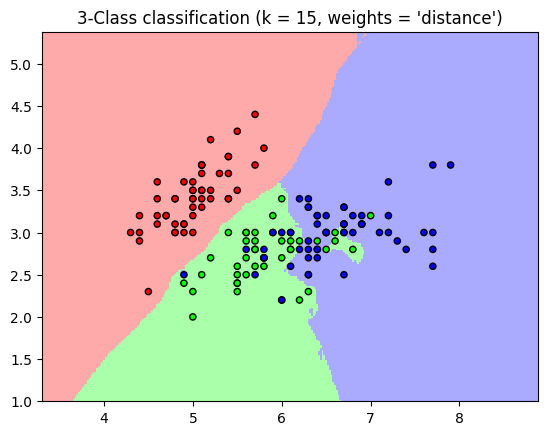

In [3]:
# sets the number of nearest neighbors
n_neighbors = 15

# import the iris data
iris = datasets.load_iris()

# we only take the first two features.
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbors Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.
- 'distance' : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors who are further away.


## Curse of Dimensionality

- As the dimensionality of a dataset grows it becomes sparse


- For an estimator to be reasonable you need the distance between points to be less than some value _d_ which depends on the problem


- The amount of data needed (to be statistically significant) grows exponentially as the dimensionality increases


### Excluding one dimension in the classification


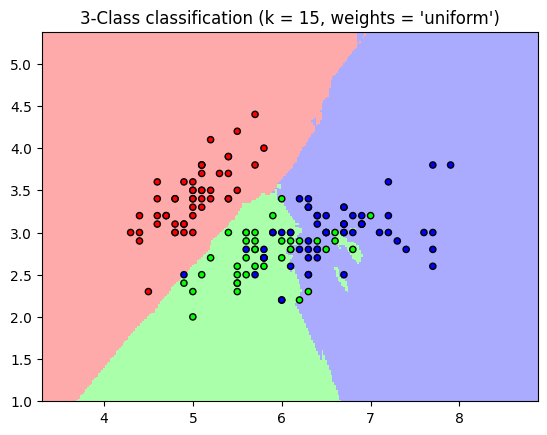

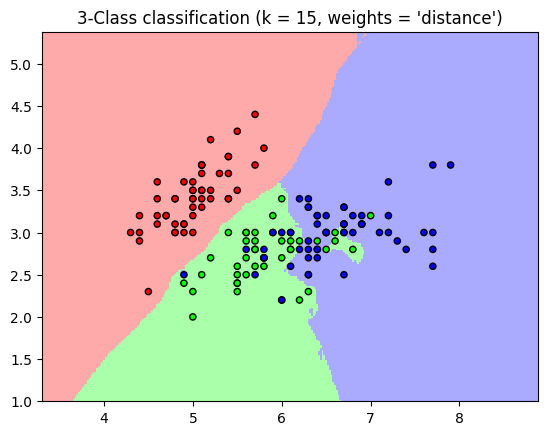

In [4]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features.
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbors Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

- In 1D this requires $n \propto 1/d$ however when you have _p_ features this becomes $n \propto 1/d^{p}$


**It is common to use ML to reduce the dimensionality of the problem**

- This could be using dimensionality reduction techniques
- Could be using featurization methods


### Using Machine Learning to Reduce the Curse of Dimensionality


### Linear Regression

$y = x\beta + \epsilon$


#### Example Dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measured on 442 patients, and an indication of disease progression after one year:

Want to predict disease progression


In [5]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [7]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(regr.score(diabetes_X_test, diabetes_y_test) )

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
0.585085427447195


**A linear model does not work that well in this high-dimensional problem**


## Shrinkage


**Problem:** if there are only a few data points per dimension, noise in the observation induces a large variance


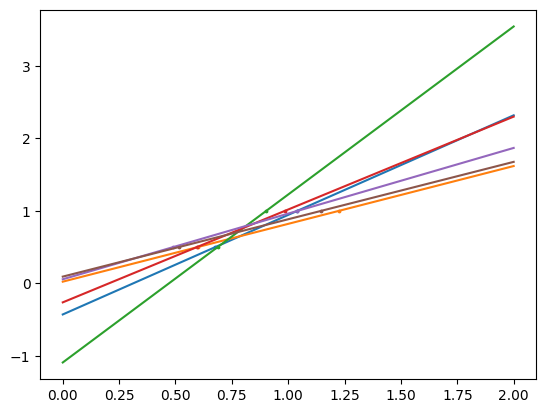

In [8]:
# makes example data
X = np.c_[ .5, 1].T
y = [.5, 1]

# makes test data
test = np.c_[ 0, 2].T

# makes an object for a linear fit
regr = LinearRegression()

# makes the figure
plt.figure() 

# fixes the seed
np.random.seed(0)

# adds variance and does the fitting for samples with variance
for _ in range(6): 
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  

The way to deal with variance is to reduce the model complexity by adding statistical damaging mechanisms called **regularization**


**A Step back with simple mathematics**

We are fitting some data to a linear model <br>
$\hat{y} = w[0] \times X[0] + w[1] \times X[1] + ... + w[n] \times X[n] + b$


When we fit the cost function is the mean squared error:

$\sum_{i=1}^{M}(y_i-\hat{y_i})^2 = \sum_{i=1}^{M}(y_i - \sum_{j=0}^{p}w_j\times x_{ij})^2$ <br>
M - number of instances or samples <br>
p - number of features


- If you do a test/train split you get an idea if the model is overfitting


- We want to add constraints on the model which reduces the complexity (regularization)


### Ridge Regression


- The cost function is altered by adding a penalty equivalent to the square of the magnitude of the coefficients
- This drives the coefficients to be small


#### The Cost Function for Ridge Regression

$\sum_{i=1}^{M}(y_i-\hat{y_i})^2 = \sum_{i=1}^{M}(y_i - \sum_{j=0}^{p}w_j\times x_{ij})^2 + \lambda\sum_{j=0}^{p}w_{j}^{2}$ <br>


- shrinks the coefficients and multicollinearity


- $\lambda$ sets the magnitude of this effect
- As $\lambda \rightarrow 0$ becomes a linear fit


#### Example: California Housing Data


##### Step 1: Loads data


In [9]:
california=datasets.fetch_california_housing()
california_df=pd.DataFrame(california.data,columns=california.feature_names)
print(california_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


##### Step 2: Adds the target into the pandas dataframe


In [10]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
california_df['Price']=california.target
print(california_df.head(3))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  


##### Step 3: Saves a new df without the price


In [11]:
newX=california_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY=california_df['Price']

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  


##### Step 4: Test Train Split


In [12]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(f'Test size: {len(X_test)} , {len(y_test)}')
print(f'Train size: {len(X_train)} , {len(y_train)}')

Test size: 6192 , 6192
Train size: 14448 , 14448


#####  Step 5: Builds the Linear Regression Object


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### Step 6: Builds the Ridge Regression Object


In [14]:
rr = Ridge(alpha=.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=1000) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=1000)

#####  Step 7: Evaluation of the Ridge Regression Model


In [15]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


linear regression train score: 0.6096935309447493
linear regression test score: 0.5910064719662456
ridge regression train score low alpha: 0.6096935309343097
ridge regression test score low alpha: 0.5910073521875898
ridge regression train score high alpha: 0.598628779921399
ridge regression test score high alpha: 0.5997728167392642


##### Step 8: Visualizing the results


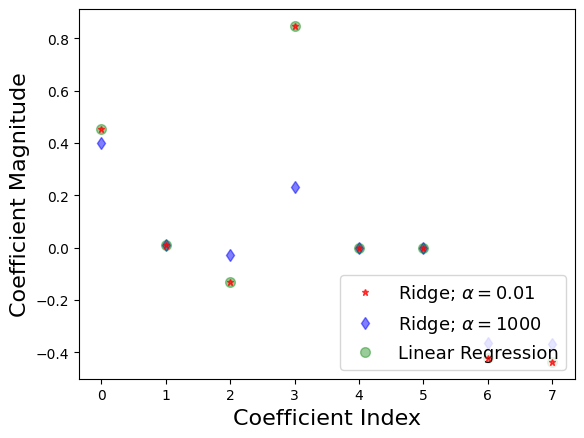

In [16]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1000$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

**What does this mean?**


- X-axis we have the coefficients for the 8 features


- When $\alpha$ is low looks like a linear fit


- When $\alpha$ is high all of the coefficients shrink


The model is less responsive to small variances in a particular parameter

- Better at generalizing


- The difference between the training and validation accuracy with a high $\alpha$ is less, this means there is less overfitting.


**Note** Ridge regression is regularly called **L2**


### Lasso Regression


#### Cost Function for Lasso Regression

$\sum_{i=1}^{M}(y_i-\hat{y_i})^2 = \sum_{i=1}^{M}(y_i - \sum_{j=0}^{p}w_j\times x_{ij})^2 + \lambda\sum_{j=0}^{p}|w_{j}|$


Just like Ridge regression:

- $\lambda$ sets the magnitude of this effect
- As $\lambda \rightarrow 0$ becomes a linear fit


Lasso or L1 regularization drives the weights to 0:


- Can be used to impose sparsity (independence) in model $\rightarrow$ used in feature selection


- Lasso regression helps reduced overfitting


#### Example: Breast Cancer Data


##### Step 1: Loads the data and makes test train split


In [17]:
cancer = load_breast_cancer()
print(cancer.keys())

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(cancer_df.head(3))

X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57  

##### Step 2: Defines the model and prints results


In [18]:
# alpha = 1

# instantiates the lasso model
lasso = Lasso()
# fits the training data
lasso.fit(X_train,y_train)
# computes the training score
train_score=lasso.score(X_train,y_train)
# computes the test score
test_score=lasso.score(X_test,y_test)
# counts the number of features used by the model
coeff_used = np.sum(lasso.coef_!=0)

# prints the results
print("training score:", train_score) 
print("test score: ", test_score)
print ("number of features used: ", coeff_used)

# alpha = 0.01

# instantiates the lasso model
lasso001 = Lasso(alpha=0.01, max_iter=int(10e5))
# fits the training data
lasso001.fit(X_train,y_train)
# computes the score
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
# counts the number of features used by the model
coeff_used001 = np.sum(lasso001.coef_!=0)

# prints the results
print( "training score for alpha=0.01:", train_score001 )
print( "test score for alpha =0.01: ", test_score001)
print( "number of features used: for alpha =0.01:", coeff_used001)

# alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=int(10e5))
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print( "training score for alpha=0.0001:", train_score00001 )
print( "test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

# linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print( "LR training score:", lr_train_score )
print( "LR test score: ", lr_test_score)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.6641831577726227
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936698
test score for alpha =0.0001:  0.7318608210757911
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055069
LR test score:  0.7329325010888672


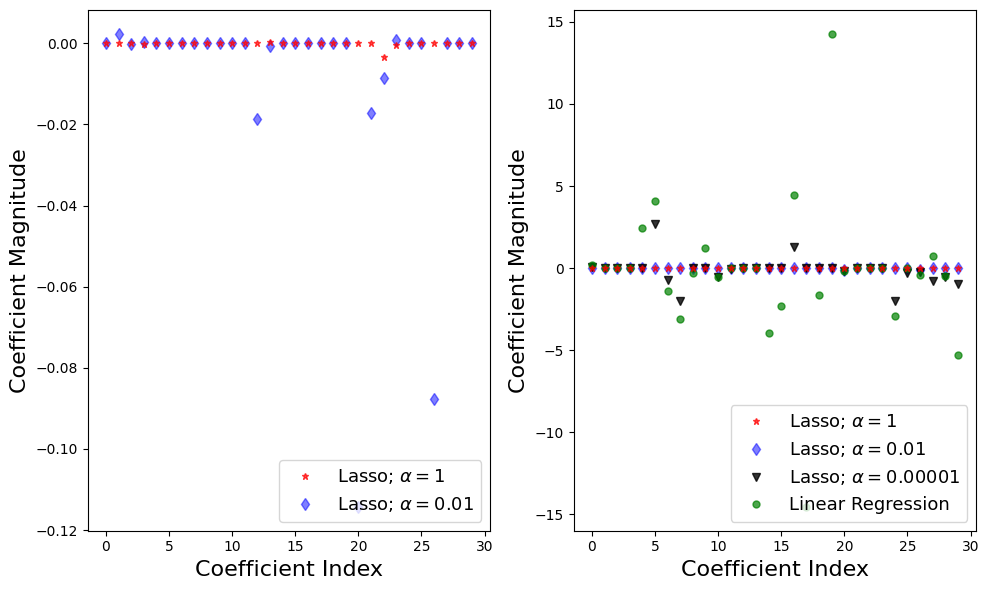

In [19]:
f = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


##### Step 3: Explaining the Results


- For the default case $\alpha = 1$, 4 out of 30 features have non-zero coefficients


**Questions: is this model overfitting or underfitting?**


- Both training and test results are low $\rightarrow$ model is underfitting


- $\alpha = 0.01$, 10 out of 30 features have non-zero coefficients, and test and training scores increase


- as $\alpha$ decreases further resemble linear regression


#### Visual Explanation of Lasso and Ridge Regression


![](figs/Lasso_ridge.png)
